In [1]:
!pip install mplsoccer -- quiet
import re
import requests
import json
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch, Pitch
import pandas as pd

ERROR: Could not find a version that satisfies the requirement quiet (from versions: none)
ERROR: No matching distribution found for quiet


In [25]:
base_url = 'https://understat.com/match/'
match = str(input('Please enter match id: '))
url = base_url + match

Please enter match id:  26757


In [3]:
url

'https://understat.com/match/26759'

In [26]:
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')

In [27]:
scripts

[<script>
 			var THEME = localStorage.getItem("theme") || 'DARK';
 			document.body.className = "theme-" + THEME.toLowerCase();
 		</script>,
 <script>
 	var shotsData 	= JSON.parse('\x7B\x22h\x22\x3A\x5B\x7B\x22id\x22\x3A\x22607738\x22,\x22minute\x22\x3A\x222\x22,\x22result\x22\x3A\x22MissedShots\x22,\x22X\x22\x3A\x220.915\x22,\x22Y\x22\x3A\x220.4929999923706055\x22,\x22xG\x22\x3A\x220.1309189647436142\x22,\x22player\x22\x3A\x22Nicolas\x20Jackson\x22,\x22h_a\x22\x3A\x22h\x22,\x22player_id\x22\x3A\x2210048\x22,\x22situation\x22\x3A\x22OpenPlay\x22,\x22season\x22\x3A\x222024\x22,\x22shotType\x22\x3A\x22Head\x22,\x22match_id\x22\x3A\x2226757\x22,\x22h_team\x22\x3A\x22Chelsea\x22,\x22a_team\x22\x3A\x22Brentford\x22,\x22h_goals\x22\x3A\x222\x22,\x22a_goals\x22\x3A\x221\x22,\x22date\x22\x3A\x222024\x2D12\x2D15\x2019\x3A00\x3A00\x22,\x22player_assisted\x22\x3A\x22Malo\x20Gusto\x22,\x22lastAction\x22\x3A\x22Cross\x22\x7D,\x7B\x22id\x22\x3A\x22607739\x22,\x22minute\x22\x3A\x2210\x22,\x22resul

In [28]:
strings = scripts[1].string

In [29]:
strings

"\n\tvar shotsData \t= JSON.parse('\\x7B\\x22h\\x22\\x3A\\x5B\\x7B\\x22id\\x22\\x3A\\x22607738\\x22,\\x22minute\\x22\\x3A\\x222\\x22,\\x22result\\x22\\x3A\\x22MissedShots\\x22,\\x22X\\x22\\x3A\\x220.915\\x22,\\x22Y\\x22\\x3A\\x220.4929999923706055\\x22,\\x22xG\\x22\\x3A\\x220.1309189647436142\\x22,\\x22player\\x22\\x3A\\x22Nicolas\\x20Jackson\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x2210048\\x22,\\x22situation\\x22\\x3A\\x22OpenPlay\\x22,\\x22season\\x22\\x3A\\x222024\\x22,\\x22shotType\\x22\\x3A\\x22Head\\x22,\\x22match_id\\x22\\x3A\\x2226757\\x22,\\x22h_team\\x22\\x3A\\x22Chelsea\\x22,\\x22a_team\\x22\\x3A\\x22Brentford\\x22,\\x22h_goals\\x22\\x3A\\x222\\x22,\\x22a_goals\\x22\\x3A\\x221\\x22,\\x22date\\x22\\x3A\\x222024\\x2D12\\x2D15\\x2019\\x3A00\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Malo\\x20Gusto\\x22,\\x22lastAction\\x22\\x3A\\x22Cross\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22607739\\x22,\\x22minute\\x22\\x3A\\x2210\\x22,\\x22result\\x22\\x3A\\x22SavedSh

In [30]:
ind_start = strings.index("('")+2
ind_end = strings.index("')")
json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')
data = json.loads(json_data)

In [31]:
data

{'h': [{'id': '607738',
   'minute': '2',
   'result': 'MissedShots',
   'X': '0.915',
   'Y': '0.4929999923706055',
   'xG': '0.1309189647436142',
   'player': 'Nicolas Jackson',
   'h_a': 'h',
   'player_id': '10048',
   'situation': 'OpenPlay',
   'season': '2024',
   'shotType': 'Head',
   'match_id': '26757',
   'h_team': 'Chelsea',
   'a_team': 'Brentford',
   'h_goals': '2',
   'a_goals': '1',
   'date': '2024-12-15 19:00:00',
   'player_assisted': 'Malo Gusto',
   'lastAction': 'Cross'},
  {'id': '607739',
   'minute': '10',
   'result': 'SavedShot',
   'X': '0.9380000305175781',
   'Y': '0.6719999694824219',
   'xG': '0.05848012864589691',
   'player': 'Nicolas Jackson',
   'h_a': 'h',
   'player_id': '10048',
   'situation': 'OpenPlay',
   'season': '2024',
   'shotType': 'LeftFoot',
   'match_id': '26757',
   'h_team': 'Chelsea',
   'a_team': 'Brentford',
   'h_goals': '2',
   'a_goals': '1',
   'date': '2024-12-15 19:00:00',
   'player_assisted': 'Moisés Caicedo',
   'lastA

In [32]:
x = []
y = []
xg = []
result = []
player = []
team = []
data_away = data['a']
data_home = data['h']

In [33]:
for index in range(len(data_home)):
    for key in data_home[index]:
        if key == 'X':
            x.append(data_home[index][key])
        if key == 'Y':
            y.append(data_home[index][key])
        if key == 'xG':
            xg.append(data_home[index][key])
        if key == 'result':
            result.append(data_home[index][key])
        if key == 'player':
            player.append(data_home[index][key])
        if key == 'h_team':
            team.append(data_home[index][key])

for index in range(len(data_away)):
    for key in data_away[index]:
        if key == 'X':
            x.append(data_away[index][key])
        if key == 'Y':
            y.append(data_away[index][key])
        if key == 'xG':
            xg.append(data_away[index][key])
        if key == 'result':
            result.append(data_away[index][key])
        if key == 'player':
            player.append(data_away[index][key])
        if key == 'a_team':
            team.append(data_away[index][key])

In [34]:
col_names = ['x','y','xg','result','player','team']
shot_df = pd.DataFrame([x,y,xg,result,player,team],index=col_names)

In [35]:
df = shot_df.T

In [36]:
df

,x,y,xg,result,player,team
0,0.915,0.4929999923706055,0.1309189647436142,MissedShots,Nicolas Jackson,Chelsea
1,0.9380000305175781,0.6719999694824219,0.05848012864589691,SavedShot,Nicolas Jackson,Chelsea
2,0.924000015258789,0.6730000305175782,0.07724382728338242,BlockedShot,Cole Palmer,Chelsea
3,0.730999984741211,0.3940000152587891,0.01732208952307701,MissedShots,Malo Gusto,Chelsea
4,0.830999984741211,0.555,0.05137373507022858,SavedShot,Cole Palmer,Chelsea
5,0.905,0.3579999923706055,0.04463621601462364,MissedShots,Noni Madueke,Chelsea
6,0.965999984741211,0.33599998474121096,0.07659464329481125,SavedShot,Enzo Fernández,Chelsea
7,0.8980000305175782,0.6359999847412109,0.09314537793397903,BlockedShot,Nicolas Jackson,Chelsea
8,0.9230000305175782,0.415,0.05515734478831291,MissedShots,Noni Madueke,Chelsea
9,0.9340000152587891,0.5579999923706055,0.049143608659505844,BlockedShot,Tosin Adarabioyo,Chelsea


In [37]:
df = df[df['xg'].notna()]

In [38]:
df

,x,y,xg,result,player,team
0,0.915,0.4929999923706055,0.1309189647436142,MissedShots,Nicolas Jackson,Chelsea
1,0.9380000305175781,0.6719999694824219,0.05848012864589691,SavedShot,Nicolas Jackson,Chelsea
2,0.924000015258789,0.6730000305175782,0.07724382728338242,BlockedShot,Cole Palmer,Chelsea
3,0.730999984741211,0.3940000152587891,0.01732208952307701,MissedShots,Malo Gusto,Chelsea
4,0.830999984741211,0.555,0.05137373507022858,SavedShot,Cole Palmer,Chelsea
5,0.905,0.3579999923706055,0.04463621601462364,MissedShots,Noni Madueke,Chelsea
6,0.965999984741211,0.33599998474121096,0.07659464329481125,SavedShot,Enzo Fernández,Chelsea
7,0.8980000305175782,0.6359999847412109,0.09314537793397903,BlockedShot,Nicolas Jackson,Chelsea
8,0.9230000305175782,0.415,0.05515734478831291,MissedShots,Noni Madueke,Chelsea
9,0.9340000152587891,0.5579999923706055,0.049143608659505844,BlockedShot,Tosin Adarabioyo,Chelsea


In [39]:
df.dtypes

x         object
y         object
xg        object
result    object
player    object
team      object
dtype: object

In [40]:
df.to_csv (r'C:\Users\nj128\OneDrive\Documents\chelsea_brentford_shots_12_15.csv', index = None, header=True) 

In [41]:
total_shots = df.shape[0]
total_goals = df[df['result'] == 'Goal'].shape[0]
df['xg'] = pd.to_numeric(df['xg'], errors ='coerce')
total_xG = df['xg'].sum()
df['x'] = pd.to_numeric(df['x'],errors = 'coerce')
points_average_distance = df['x'].mean()
actual_average_distance = 120 - (df['x'] * 1.2).mean()

print(f"Total Shots: {total_shots}")
print(f"Total Goals: {total_goals}")
print(f"Total xG: {total_xG:.2f}")
print(f"Points Average Distance: {points_average_distance:.2f}")
print(f"Actual Average Distance: {actual_average_distance:.2f}")

Total Shots: 35
Total Goals: 3
Total xG: 4.29
Points Average Distance: 0.87
Actual Average Distance: 118.95


In [42]:
shot_data = df

NEW DYNAMIC TEAM TEXT VIZ

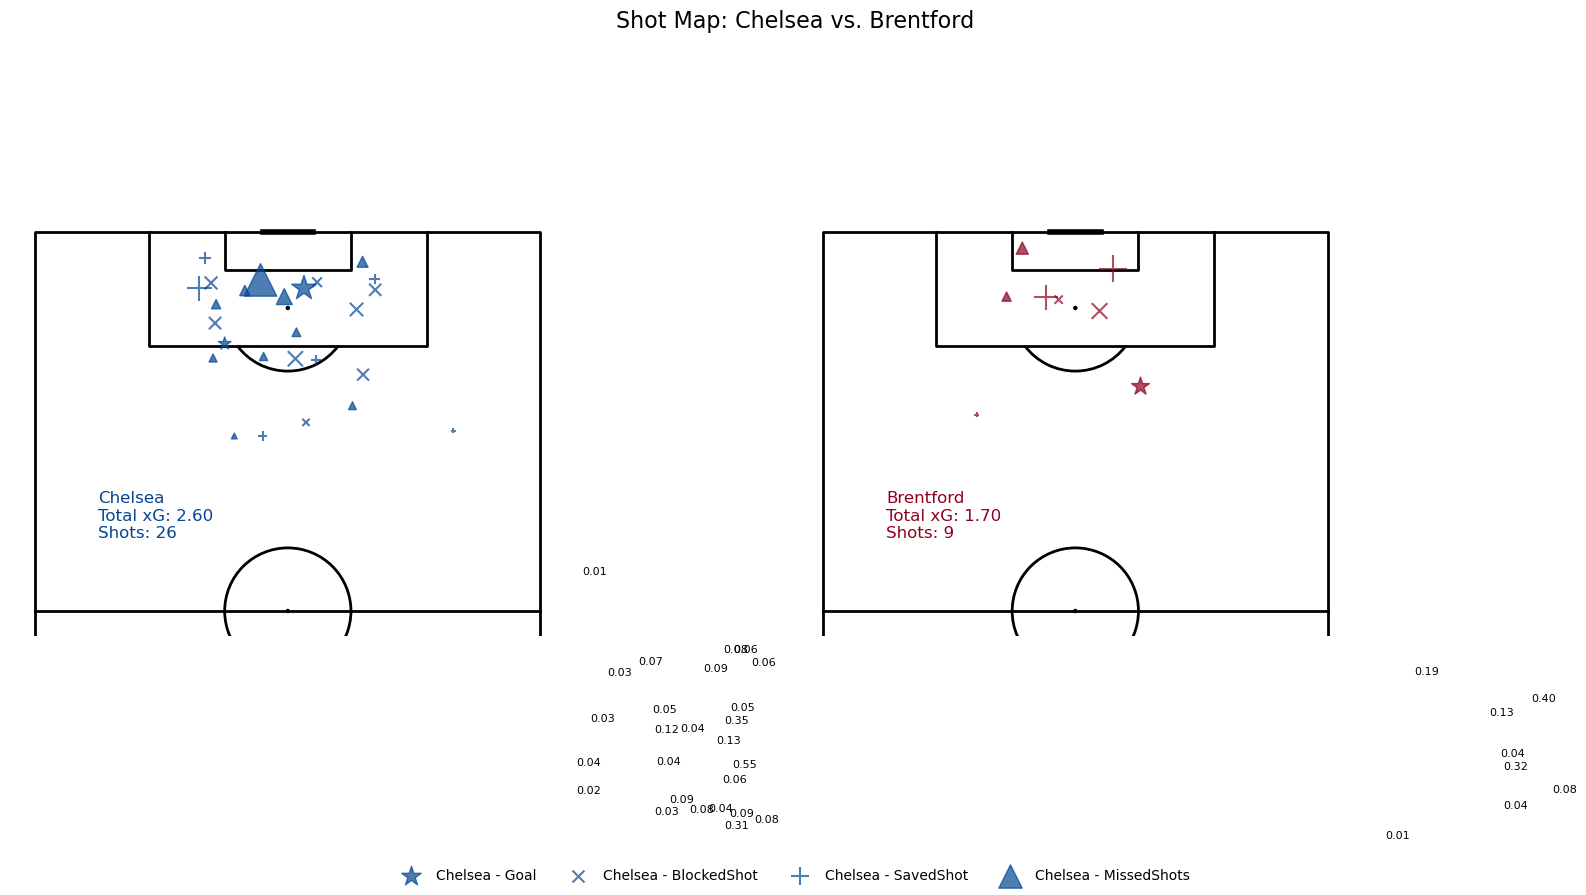

In [43]:
# Ensure required columns exist and are numeric
required_columns = {'team', 'result', 'x', 'y', 'xg'}
if not required_columns.issubset(shot_data.columns):
    raise ValueError(f"shot_data is missing one or more required columns: {required_columns}")

# Convert necessary columns to numeric
for col in ['x', 'y', 'xg']:
    shot_data[col] = pd.to_numeric(shot_data[col], errors='coerce')

# Drop rows with invalid numeric values
shot_data.dropna(subset=['x', 'y', 'xg'], inplace=True)

# Get the unique team names (assume first team is home and second is away)
unique_teams = shot_data['team'].unique()
if len(unique_teams) != 2:
    raise ValueError("Expected exactly two unique teams in the 'team' column.")

home_team, away_team = unique_teams

# Define team colors (unique for each team)
team_colors = {
    home_team: '#034694',  # Color Home Team
    away_team: '#8D021F'   # Color Away Team
}

# Define markers for each shot result
result_markers = {
    'Goal': '*',           # Circle
    'BlockedShot': 'x',    # Cross
    'SavedShot': '+',      # Square
    'MissedShots': '^'     # Triangle
}

# Split the data by team
team_data = {team: shot_data[shot_data['team'] == team] for team in unique_teams}

# Create the figure with two half-pitches
fig, axs = plt.subplots(1, 2, figsize=(16, 9))
pitch = VerticalPitch(pitch_color='white', line_color='black', half=True)

# Plot each half of the pitch
for i, ax in enumerate(axs):
    pitch.draw(ax=ax)  # Draw pitch on each axis

    # Determine team and flip y-axis for away team
    team = home_team if i == 0 else away_team
    data = team_data[team]

    for result, marker in result_markers.items():
        result_data = data[data['result'] == result]
        if not result_data.empty:
            pitch.scatter(
                result_data['x'] * 120,  # Scale x-coordinates
                result_data['y'] * 80 if i == 0 else 80 - result_data['y'] * 80,  # Flip y for away team
                s=result_data['xg'] * 1000,  # Marker size proportional to xG
                color=team_colors[team], marker=marker, alpha=0.7,
                label=f"{team} - {result}" if i == 0 else "", ax=ax
            )
            # Annotate xG values
            for _, row in result_data.iterrows():
                ax.text(
                    row['x'] * 120,
                    row['y'] * 80 if i == 0 else 80 - row['y'] * 80,
                    f"{row['xg']:.2f}",
                    color='black', ha='center', va='center', fontsize=8
                )
    # Add team-specific text for xG summary
    total_xg = data['xg'].sum()
    total_shots = data.shape[0]
    ax.text(
        10, 75,  # Position for text
        f"{team}\nTotal xG: {total_xg:.2f}\nShots: {total_shots}",
        fontsize=12, color=team_colors[team], ha='left', va='center'
    )

# Add a shared title
fig.suptitle(f'Shot Map: {home_team} vs. {away_team}', fontsize=16)

# Add legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4, frameon=False, fontsize=10)

plt.tight_layout()
plt.show()
